In [2]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
#import numpy as np
#import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('recipes.csv')

In [5]:
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

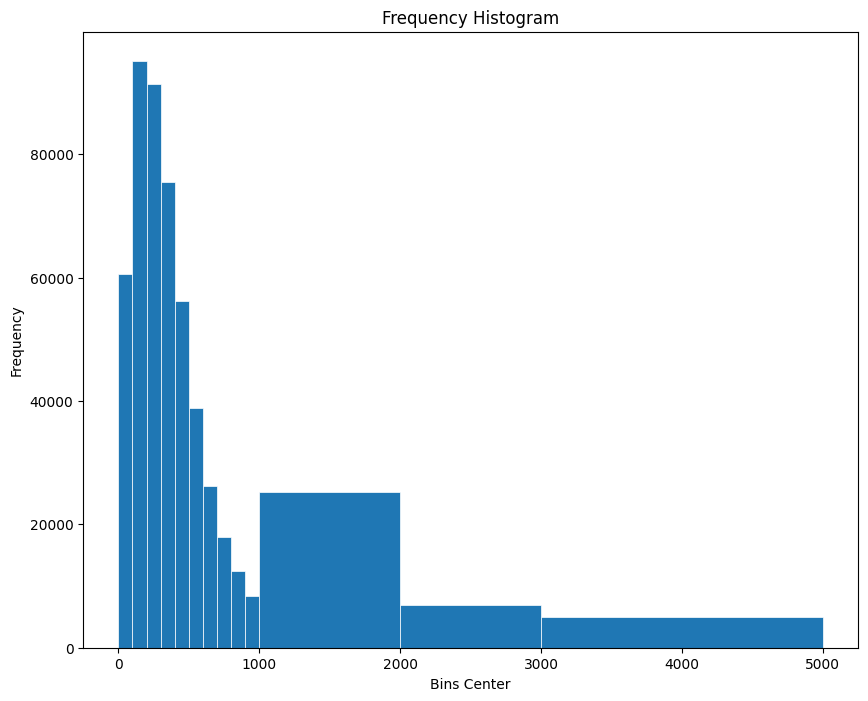

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(data.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

In [8]:
dataset=data.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

In [9]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [10]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[6:15],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [11]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375703 entries, 0 to 522515
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               313207 non-null  object 
 3   PrepTime               375703 non-null  object 
 4   TotalTime              375703 non-null  object 
 5   RecipeIngredientParts  375703 non-null  object 
 6   Calories               375703 non-null  float64
 7   FatContent             375703 non-null  float64
 8   SaturatedFatContent    375703 non-null  float64
 9   CholesterolContent     375703 non-null  float64
 10  SodiumContent          375703 non-null  float64
 11  CarbohydrateContent    375703 non-null  float64
 12  FiberContent           375703 non-null  float64
 13  SugarContent           375703 non-null  float64
 14  ProteinContent         375703 non-null  f

In [12]:
extracted_data.iloc[:,6:15].corr()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.767356,0.603317,0.478934,0.501082,0.711640,0.458711,0.180895,0.689447
FatContent,0.767356,1.000000,0.767357,0.440515,0.381944,0.223549,0.192142,0.042603,0.468088
SaturatedFatContent,0.603317,0.767357,1.000000,0.512186,0.319671,0.176623,0.044003,0.090721,0.388618
CholesterolContent,0.478934,0.440515,0.512186,1.000000,0.335843,0.066104,-0.047346,-0.036112,0.675302
SodiumContent,0.501082,0.381944,0.319671,0.335843,1.000000,0.294636,0.260479,-0.055518,0.500457
CarbohydrateContent,0.711640,0.223549,0.176623,0.066104,0.294636,1.000000,0.580535,0.390120,0.255447
FiberContent,0.458711,0.192142,0.044003,-0.047346,0.260479,0.580535,1.000000,0.068758,0.273488
SugarContent,0.180895,0.042603,0.090721,-0.036112,-0.055518,0.390120,0.068758,1.000000,-0.120441
ProteinContent,0.689447,0.468088,0.388618,0.675302,0.500457,0.255447,0.273488,-0.120441,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:15].to_numpy())

In [14]:
prep_data

array([[-0.55093359, -0.91281917, -0.77924852, ...,  0.15672078,
         2.35502102, -0.68338127],
       [ 1.47428542,  1.13139595, -0.0647135 , ...,  3.91055068,
         2.56324444,  1.25158691],
       [-0.92414618, -1.11248669, -1.12222533, ...,  0.4855234 ,
         0.98513013, -0.60183088],
       ...,
       [ 0.49162165,  0.73206091,  1.85024037, ..., -0.61048534,
         1.76322815, -0.56476253],
       [ 0.25704672,  0.03797856,  1.02137974, ..., -0.61048534,
         1.54404561, -0.63148557],
       [-1.40937801, -1.09347074, -1.12222533, ..., -0.82968708,
        -0.94367625, -0.74269064]])

In [15]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
neigh.fit(prep_data)

NearestNeighbors()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [17]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors()>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [18]:
pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]

array([     0,  19679, 144322, 262699, 260633, 325236, 173641, 249938,
       245130, 206478], dtype=int64)

In [19]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
206883,215824,Blueberry Orange Smoothie,NaN,PT5M,PT5M,"c(""blueberries"", ""fresh blueberries"")",179.4,2.6,1.3,0.7,34.3,38.1,3.0,30.4,3.1,"c(""Combine first 5 ingredients in blender."", ""..."
367808,381181,Tropical Twister Smoothies,NaN,PT5M,PT5M,"c(""fresh mango"", ""papaya"", ""fresh pineapple ch...",190.8,2.6,1.4,8.0,32.4,41.3,3.6,29.6,4.0,"c(""Combine all ingredients in a blender and pr..."
365065,378348,Rustic Applesauce,PT25M,PT20M,PT45M,"c(""braeburn apples"", ""granny smith apples"", ""b...",152.7,1.8,1.0,5.9,31.6,36.1,3.7,30.2,0.5,"c(""Combine first 8 ingredients in a Dutch oven..."
452690,469399,All American Apple Pie,PT1H,PT30M,PT1H30M,"c(""apples"", ""cider vinegar"", ""brown sugar"", ""s...",162.9,2.4,1.4,7.7,78.3,36.8,3.3,29.1,0.9,"c(""Preheat oven to 425* and place oven rack in..."
246779,256836,Fantastic Fruit Salad,NaN,PT15M,PT15M,"c(""bananas"", ""red apples"", ""pineapple"", ""half-...",169.0,2.1,1.2,5.6,20.5,39.6,4.1,28.9,1.6,"c(""Mix all the ingredients in a large serving ..."
350291,363219,Sunshine Salad,NaN,PT10M,PT10M,"c(""mandarin oranges"", ""oranges"", ""pineapple ti...",175.4,3.1,0.8,3.5,99.1,35.4,3.4,30.0,4.3,"c(""Place cleaned greens in salad bowl. Add fru..."
343685,356477,Creamy Fruit Salad,NaN,PT15M,PT15M,"c(""bananas"", ""apple"", ""navel orange"", ""vanilla...",183.5,2.2,1.3,7.4,34.0,41.3,4.2,31.4,3.5,"c(""In a serving bowl, combine the fruit cockta..."
291138,302510,Berry Frappe,NaN,PT4H,PT4H,"c(""frozen unsweetened raspberries"", ""strawberr...",149.9,1.4,0.7,4.0,32.9,34.6,3.5,30.2,1.8,"c(""In container of electric blender, combine h..."


In [20]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)].head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,9.8,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a..."
22,60,Blueberry Dessert,NaN,PT35M,PT35M,"c(""Bisquick baking mix"", ""sugar"", ""butter"", ""m...",381.1,17.3,8.8,62.1,437.6,54.5,1.6,36.9,3.9,"c(""Heat oven to 400 degrees."", ""Mix 2 cups bak..."


In [21]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,6:15].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[6:15],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)] 
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)


In [22]:
test_input=extracted_data.iloc[0:1,6:15].to_numpy()
recommand(dataset,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine..."
485171,503065,Glazed Pineapple With Cinnamon Creme Fraiche,PT10M,PT10M,PT20M,"c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,"c(""Mix the lime juice and half the lime zest w..."
158110,165636,Lemon Float Punch,PT120H,PT5M,PT120H5M,"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,"c(""Combine lemon juice and sugar; stir to diss..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."


In [23]:
import pickle

In [24]:
pickle.dump(neigh, open('model.pkl','wb'))

In [25]:
pickle.dump(scaler, open('scaler.pkl','wb'))